# Get Data

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd
import re 
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data.csv')
df.head()

,index,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [4]:
df['Toxicity'].value_counts()

0    32592
1    24153
Name: Toxicity, dtype: int64

In [5]:
vc = df['Toxicity'].value_counts()
index = list(vc.index)
count = min(vc.values)

In [6]:
count, index

(24153, [0, 1])

In [7]:
df_bal = pd.DataFrame()
for i in index:
  temp = df[df['Toxicity']==i].sample(count)
  df_bal = df_bal.append(temp, ignore_index = True)

In [8]:
df = df_bal.copy()

In [9]:
df['Toxicity'].value_counts()

0    24153
1    24153
Name: Toxicity, dtype: int64

In [10]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

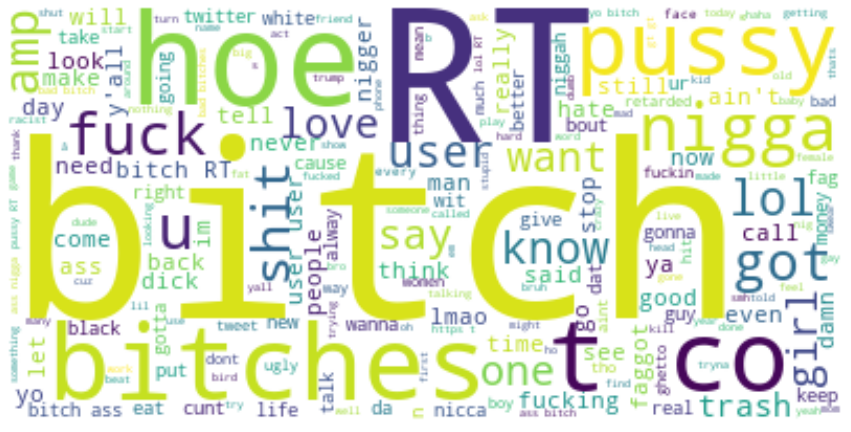

In [11]:
# Toxic word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(" ".join(i for i in df[df['Toxicity']==1].tweet))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

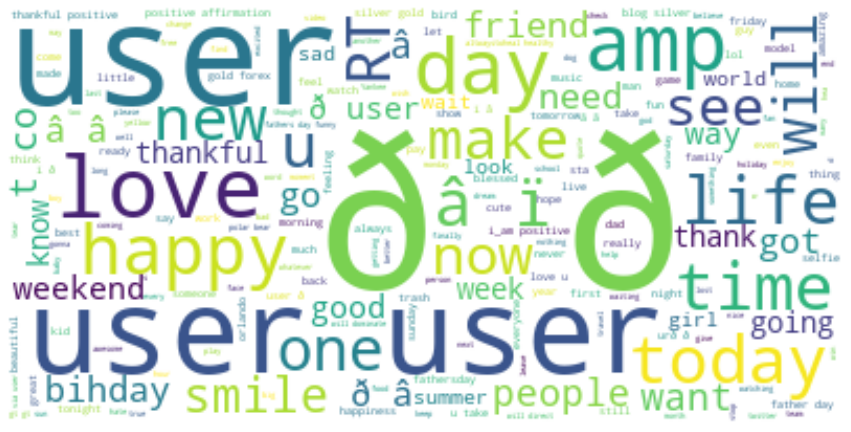

In [12]:
# Non toxic word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(" ".join(i for i in df[df['Toxicity']==0].tweet))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Text Processing

In [13]:
# Import text processing libraries
import string
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')

from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import spacy
import en_core_web_sm

In [14]:
nlp = spacy.load('en_core_web_sm')

def clean_string(text, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im', 'rt', 'u', 'user', 'n', 'youre', 'ð', '', 'hello']

    text_filtered = [word for word in text if not word in useless_words]

    # Remove mentions
    text_filtered = [re.sub("@[A-Za-z0-9_]+","", w) for w in text_filtered]
    
    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
    text_filtered = [re.sub(r'[^a-zA-Z0-9]', '', w) for w in text_filtered]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [21]:
df['tweet'] = df['tweet'].apply(lambda tweet: clean_string(tweet, 'Lem'))

In [22]:
df.head()

,index,Toxicity,tweet
0,3365,0,thats dont see kid riding bike anymore gone da...
1,3754,0,taking student nyc getting workshop seeing sho...
2,28610,0,totally epic
3,8085,0,cooky protein fun lennyandlarrys completecooki...
4,22891,0,learn gonna get anything sitting bloody arse l...


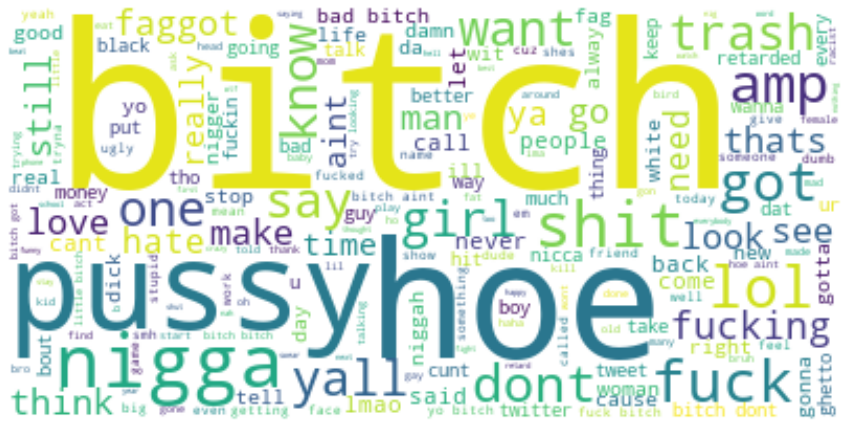

In [23]:
# Toxic cleaned word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(" ".join(i for i in df[df['Toxicity']==1].tweet))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

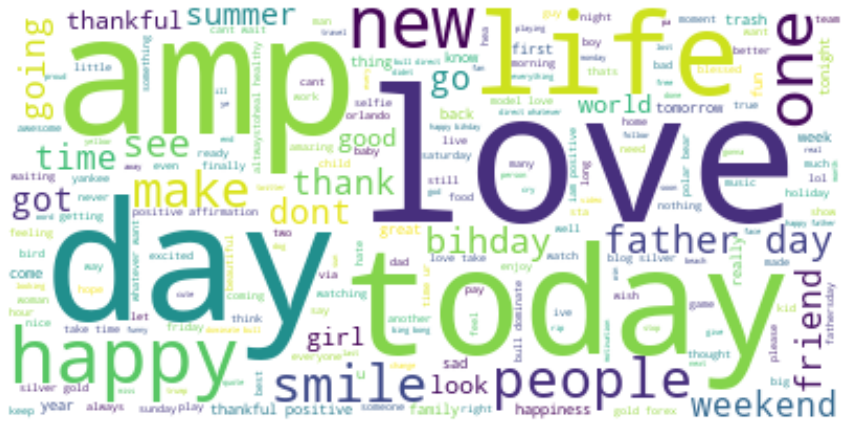

In [24]:
# Non toxic word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(" ".join(i for i in df[df['Toxicity']==0].tweet))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tokenization

In [25]:
text = df['tweet'].tolist()

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

In [27]:
len(tokenizer.word_counts)

50079

In [28]:
vocab_size = len(tokenizer.word_counts) + 1

In [29]:
encoded_text = tokenizer.texts_to_sequences(text)

In [30]:
max_length = 120
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [31]:
print(X)

[[   40     6    30 ...     0     0     0]
 [  577   683   796 ...     0     0     0]
 [ 1436  1840     0 ...     0     0     0]
 ...
 [50077     1     0 ...     0     0     0]
 [50078 50079   122 ...     0     0     0]
 [  116   145   112 ...     0     0     0]]


In [32]:
X.shape

(48306, 120)

# Model Building

In [33]:
y = df['Toxicity']
y

0        0
1        0
2        0
3        0
4        0
        ..
48301    1
48302    1
48303    1
48304    1
48305    1
Name: Toxicity, Length: 48306, dtype: int64

In [34]:
x = df['tweet']
y = df['Toxicity']

In [35]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
48301    1
48302    1
48303    1
48304    1
48305    1
Name: Toxicity, Length: 48306, dtype: int64


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)

In [37]:
x_train.shape, x_test.shape

((38644, 120), (9662, 120))

In [38]:
from sklearn.naive_bayes import ComplementNB

In [39]:
# 61%
nb = ComplementNB()
nb.fit(x_train, y_train)

ComplementNB()

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# 90%
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', class_weight='balanced', random_state=None)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
# 63%
mlp = MLPClassifier()
mlp.fit(x_train, y_train) 

MLPClassifier()

# Model Testing

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [54]:
y_pred = mlp.predict(x_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.81      0.67      4831
           1       0.68      0.40      0.50      4831

    accuracy                           0.60      9662
   macro avg       0.63      0.60      0.59      9662
weighted avg       0.63      0.60      0.59      9662



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

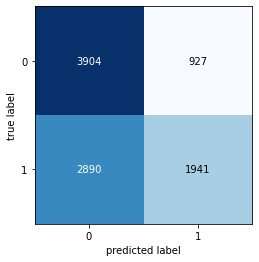

In [56]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# Testing Custom Data

In [231]:
x = 'hello nigga'

In [232]:
def get_encoded(x):
  x = clean_string(x)
  x = tokenizer.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding = 'post')
  return x

In [233]:
pred = tree.predict(get_encoded(x))

In [234]:
print(pred)

[0]


# Save Tokenizer  Model

In [215]:
import pickle

In [216]:
pickle.dump(tokenizer, open("api/tokenizer.pkl", 'wb'))
pickle.dump(tree,  open("api/tree.pkl", "wb"))